In [1]:
import json

In [14]:
pwd

'C:\\Users\\yuqia\\pydata-book\\datasets\\bitly_usagov'

In [15]:
cd -

C:\Users\yuqia\pydata-book\datasets


In [16]:
path = 'bitly_usagov\example.txt'

In [17]:
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [18]:
records = [json.loads(line) for line in open(path)]

In [19]:
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

In [20]:
records[0]['tz']

'America/New_York'

In [21]:
print(records[0]['tz'])

America/New_York


In [22]:
##Counting time zones
time_zones = [rec['tz'] for rec in records if 'tz' in rec]

In [23]:
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [24]:
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

get_counts(time_zones)

{'America/New_York': 1251,
 'America/Denver': 191,
 'America/Sao_Paulo': 33,
 'Europe/Warsaw': 16,
 '': 521,
 'America/Los_Angeles': 382,
 'Asia/Hong_Kong': 10,
 'Europe/Rome': 27,
 'Africa/Ceuta': 2,
 'Europe/Madrid': 35,
 'Asia/Kuala_Lumpur': 3,
 'Asia/Nicosia': 1,
 'Europe/London': 74,
 'Pacific/Honolulu': 36,
 'America/Chicago': 400,
 'Europe/Malta': 2,
 'Europe/Lisbon': 8,
 'Europe/Paris': 14,
 'Europe/Copenhagen': 5,
 'America/Mazatlan': 1,
 'Europe/Dublin': 3,
 'Europe/Brussels': 4,
 'America/Vancouver': 12,
 'Europe/Amsterdam': 22,
 'Europe/Prague': 10,
 'Europe/Stockholm': 14,
 'America/Anchorage': 5,
 'Asia/Bangkok': 6,
 'Europe/Berlin': 28,
 'America/Rainy_River': 25,
 'Europe/Budapest': 5,
 'Asia/Tokyo': 37,
 'Europe/Vienna': 6,
 'America/Phoenix': 20,
 'Asia/Jerusalem': 3,
 'Asia/Karachi': 3,
 'America/Bogota': 3,
 'America/Indianapolis': 20,
 'America/Montreal': 9,
 'Asia/Calcutta': 9,
 'Europe/Skopje': 1,
 'Asia/Beirut': 4,
 'Australia/NSW': 6,
 'Chile/Continental': 6,
 

In [27]:
from collections import defaultdict

def get_counts2(sequence):
    counts = defaultdict(int) # values will initialize to 0
    for x in sequence:
        counts[x] += 1
    return counts

counts2 = get_counts2(time_zones)
counts1 = get_counts(time_zones)
counts2['America/New_York'] == counts1['America/New_York']

True

In [28]:
len(time_zones)

3440

In [30]:
def top_counts(count_dict, n = 10):
    value_key_pairs = [(count,tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

top_counts(counts1)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [31]:
from collections import Counter
counts = Counter(time_zones)
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

In [32]:
#Counting time zones with pandas
from pandas import DataFrame, Series
import pandas as pd
frame = DataFrame(records)
frame

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3555,Mozilla/4.0 (compatible; MSIE 9.0; Windows NT ...,US,1.0,America/New_York,NJ,e5SvKE,fqPSr9,tweetdeckapi,en,1.usa.gov,direct,http://www.fda.gov/AdvisoryCommittees/Committe...,1.331927e+09,1.301298e+09,Paramus,"[40.9445, -74.07]",NaN,NaN
3556,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,US,0.0,America/Chicago,OK,jQLtP4,jQLtP4,bitly,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,http://www.okc.gov/PublicNotificationSystem/Fo...,1.331927e+09,1.307530e+09,Oklahoma City,"[35.4715, -97.518997]",NaN,NaN
3557,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331927e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
3558,GoogleProducer,US,0.0,America/Los_Angeles,CA,zjtI4X,zjtI4X,bitly,NaN,1.usa.gov,direct,http://www.ahrq.gov/qual/qitoolkit/,1.331927e+09,1.327529e+09,Mountain View,"[37.419201, -122.057404]",NaN,NaN


In [33]:
frame['tz'][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [34]:
tz_counts = frame['tz'].value_counts()

In [35]:
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

In [36]:
clean_tz = frame['tz'].fillna('Missing')
type(clean_tz)

pandas.core.series.Series

In [37]:
clean_tz[clean_tz == ''] = 'Unknown'

In [38]:
tz_counts = clean_tz.value_counts()

In [39]:
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

In [40]:
type(tz_counts)

pandas.core.series.Series

In [41]:
tz_counts

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
                       ... 
America/Costa_Rica        1
America/Mazatlan          1
Europe/Skopje             1
Europe/Sofia              1
America/St_Kitts          1
Name: tz, Length: 98, dtype: int64

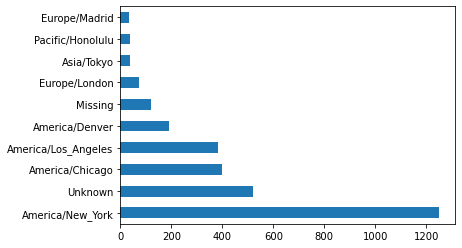

In [42]:
tz_counts[:10].plot(kind='barh',rot=0)

In [43]:
frame['a'][1]

'GoogleMaps/RochesterNY'

In [44]:
frame['a'][50]

'Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2'

In [45]:
frame['a'][51]

'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P925/V10e Build/FRG83G) AppleWebKit/533.1 (KHTML, like Gecko) Version/4.0 Mobile Safari/533.1'

In [46]:
results = Series([x.split()[0] for x in frame.a.dropna()])

In [47]:
results[:5]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [48]:
results.value_counts()[:8]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

In [50]:
cframe = frame[frame.a.notnull()]

In [52]:
import numpy as np
operating_system = np.where(cframe['a'].str.contains('Windows'),'Windows','Not Windows')

In [53]:
operating_system[:5]

array(['Windows', 'Not Windows', 'Windows', 'Not Windows', 'Windows'],
      dtype='<U11')

In [54]:
cframe

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3555,Mozilla/4.0 (compatible; MSIE 9.0; Windows NT ...,US,1.0,America/New_York,NJ,e5SvKE,fqPSr9,tweetdeckapi,en,1.usa.gov,direct,http://www.fda.gov/AdvisoryCommittees/Committe...,1.331927e+09,1.301298e+09,Paramus,"[40.9445, -74.07]",NaN,NaN
3556,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,US,0.0,America/Chicago,OK,jQLtP4,jQLtP4,bitly,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,http://www.okc.gov/PublicNotificationSystem/Fo...,1.331927e+09,1.307530e+09,Oklahoma City,"[35.4715, -97.518997]",NaN,NaN
3557,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331927e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
3558,GoogleProducer,US,0.0,America/Los_Angeles,CA,zjtI4X,zjtI4X,bitly,NaN,1.usa.gov,direct,http://www.ahrq.gov/qual/qitoolkit/,1.331927e+09,1.327529e+09,Mountain View,"[37.419201, -122.057404]",NaN,NaN


In [58]:
by_tz_os = cframe.groupby(['tz',operating_system])
by_tz_os

In [ ]:
#Group counts analogous to value_counts function, can be computed using the .size method

In [56]:
agg_counts = by_tz_os.size().unstack().fillna(0)

In [62]:
agg_counts

,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
...,...,...
Europe/Volgograd,0.0,1.0
Europe/Warsaw,1.0,15.0
Europe/Zurich,4.0,0.0


In [63]:
# Use to sort in ascending order
# pandas.Series.sum() return the sum of values over the requested axis
# Series.argsort() return the integer indices that would sort the Series values
indexer = agg_counts.sum(1).argsort()
indexer

tz
                       24
Africa/Cairo           20
Africa/Casablanca      21
Africa/Ceuta           92
Africa/Johannesburg    87
                       ..
Europe/Volgograd       15
Europe/Warsaw          22
Europe/Zurich          12
Pacific/Auckland        0
Pacific/Honolulu       29
Length: 97, dtype: int64

In [60]:
indexer[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

In [61]:
type(indexer)

pandas.core.series.Series

In [64]:
#Series.take() return the elements in the given positional indices along an axis
count_subset = agg_counts.take(indexer)[-10:]

In [65]:
count_subset

,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


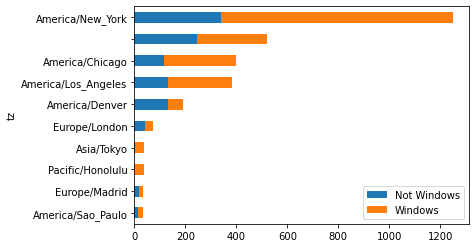

In [66]:
count_subset.plot(kind='barh', stacked=True)

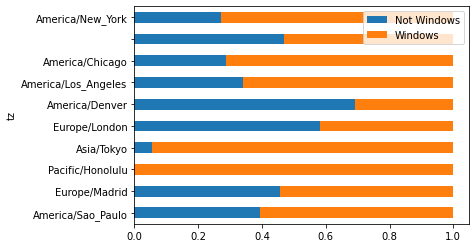

In [67]:
normed_subset = count_subset.div(count_subset.sum(1), axis=0)
normed_subset.plot(kind='barh',stacked=True)

=======================================================================

============================================================================

In [68]:
pwd

'C:\\Users\\yuqia\\pydata-book\\datasets'

In [69]:
cd movielens

C:\Users\yuqia\pydata-book\datasets\movielens


In [71]:
import pandas as pd
unames = ['user_id','gender','age','occupation','zip']
users = pd.read_table('users.dat', sep='::', header=None, names=unames,engine='python')

rnames = ['user_id','movie_id','rating','timestamp']
ratings = pd.read_table('ratings.dat', sep='::', header=None, names=rnames,engine='python')

mnames = ['movie_id','title','genres']
movies = pd.read_table('movies.dat',sep='::',header=None, names=mnames,engine='python')

In [72]:
users[:5]

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [73]:
ratings[:5]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [97]:
movies[:5]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [98]:
data = pd.merge(pd.merge(ratings,users),movies)

In [99]:
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western


In [100]:
data.iloc[0]

user_id                                            1
movie_id                                        1193
rating                                             5
timestamp                                  978300760
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object

In [101]:
mean_ratings = data.pivot_table('rating', index='title',columns='gender',aggfunc='mean')

In [102]:
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [103]:
#Filter down to movies that received at least 250 ratings
ratings_by_title = data.groupby('title').size()

In [104]:
ratings_by_title[:10]

title
$1,000,000 Duck (1971)                37
'Night Mother (1986)                  70
'Til There Was You (1997)             52
'burbs, The (1989)                   303
...And Justice for All (1979)        199
1-900 (1994)                           2
10 Things I Hate About You (1999)    700
101 Dalmatians (1961)                565
101 Dalmatians (1996)                364
12 Angry Men (1957)                  616
dtype: int64

In [105]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]

active_titles

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

In [106]:
mean_ratings = mean_ratings.loc[active_titles]

In [107]:
mean_ratings

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
...,...,...
Young Guns (1988),3.371795,3.425620
Young Guns II (1990),2.934783,2.904025
Young Sherlock Holmes (1985),3.514706,3.363344


In [108]:
top_female_ratings = mean_ratings.sort_values(by='F',ascending=False)

In [109]:
top_female_ratings[:10]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


In [110]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']

In [111]:
sorted_by_diff = mean_ratings.sort_values(by='diff')

In [112]:
sorted_by_diff[:15]

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


In [113]:
#Reverse order of rows, take first 15 rows
sorted_by_diff[::-1][:15]

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Hidden, The (1987)",3.137931,3.745098,0.607167
Rocky III (1982),2.361702,2.943503,0.581801
Caddyshack (1980),3.396135,3.969737,0.573602


In [114]:
#Standard deviation of rating grouped by title
rating_std_by_title = data.groupby('title')['rating'].std()

In [115]:
#Filter down to active titles
rating_std_by_title = rating_std_by_title.loc[active_titles]

In [117]:
#Order Series by value in descending order
rating_std_by_title.sort_values(ascending=False)[:10]

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

===============================================================================

===============================================================================

In [118]:
pwd

'C:\\Users\\yuqia\\pydata-book\\datasets\\movielens'

In [119]:
cd -

C:\Users\yuqia\pydata-book\datasets


In [120]:
cd babynames

C:\Users\yuqia\pydata-book\datasets\babynames


In [121]:
cd babynames_to_date

C:\Users\yuqia\pydata-book\datasets\babynames\babynames_to_date


In [123]:
import pandas as pd

names1880 = pd.read_csv('yob1880.txt',names=['name','sex','births'])

names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [124]:
names1880.groupby('sex').births.sum()

sex
F     90994
M    110490
Name: births, dtype: int64

In [125]:
# 2019 is the last available year right now
years = range(1880,2020)

pieces = []
columns = ['name','sex','births']

for year in years:
    path = 'yob%d.txt' % year
    frame = pd.read_csv(path, names = columns)
    
    frame['year'] = year
    pieces.append(frame)
    
names = pd.concat(pieces,ignore_index=True)

In [126]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1989396,Zyheem,M,5,2019
1989397,Zykel,M,5,2019
1989398,Zyking,M,5,2019
1989399,Zyn,M,5,2019


In [129]:
total_births = names.pivot_table('births',index='year',columns='sex',aggfunc=sum)

In [130]:
type(total_births)

pandas.core.frame.DataFrame

In [131]:
total_births.tail()

sex,F,M
year,,
2015,1781725,1913059
2016,1767902,1893471
2017,1721550,1845472
2018,1694640,1809166
2019,1665373,1779948


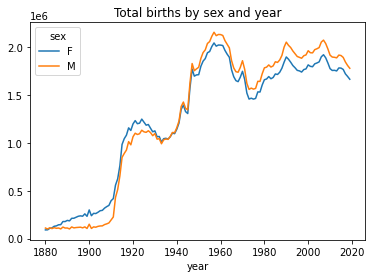

In [132]:
total_births.plot(title='Total births by sex and year')

In [133]:
# Group the data by year and sex, then add a new column 'pop' to each group
def add_prop(group):
    # Integer division floors
    births = group.births.astype(float)
    
    group['prop'] = births / births.sum()
    return group

names = names.groupby(['year', 'sex']).apply(add_prop)

In [134]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1989396,Zyheem,M,5,2019,0.000003
1989397,Zykel,M,5,2019,0.000003
1989398,Zyking,M,5,2019,0.000003
1989399,Zyn,M,5,2019,0.000003


In [135]:
# Sanity check
np.allclose(names.groupby(['year','sex']).prop.sum(),1)

True

In [136]:
# The top 1000 names for each sex/year combination
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]

grouped = names.groupby(['year','sex'])
top1000 = grouped.apply(get_top1000)

In [137]:
top1000

name sex  births  year      prop
year sex                                               
1880 F   0             Mary   F    7065  1880  0.077642
         1             Anna   F    2604  1880  0.028617
         2             Emma   F    2003  1880  0.022012
         3        Elizabeth   F    1939  1880  0.021309
         4           Minnie   F    1746  1880  0.019188
...                     ...  ..     ...   ...       ...
2019 M   1976350      Stone   M     209  2019  0.000117
         1976349      Seven   M     209  2019  0.000117
         1976348      Dhruv   M     209  2019  0.000117
         1976347      Aayan   M     209  2019  0.000117
         1976351       Rome   M     208  2019  0.000117

[279877 rows x 5 columns]

In [139]:
# do-it-yourself approach
pieces = []
for year, group in names.groupby(['year','sex']):
    pieces.append(group.sort_values(by='births', ascending=False)[:1000])
top1000_1 = pd.concat(pieces, ignore_index=True)

In [140]:
top1000_1

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
279872,Stone,M,209,2019,0.000117
279873,Seven,M,209,2019,0.000117
279874,Dhruv,M,209,2019,0.000117
279875,Aayan,M,209,2019,0.000117


In [141]:
boys = top1000_1[top1000_1.sex == 'M']

girls = top1000_1[top1000_1.sex == 'F']

In [143]:
total_births = top1000_1.pivot_table('births', index='year', columns='name',aggfunc=sum)

In [144]:
total_births

name,Aaden,Aadhya,Aaliyah,Aanya,Aarav,Aaron,Aarush,Aayan,Ab,Abagail,...,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri,Zyaire,Zyon
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,...,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN,NaN,NaN
1881,NaN,NaN,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,...,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN,NaN,NaN
1882,NaN,NaN,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,...,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN,NaN,NaN
1883,NaN,NaN,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,...,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN,NaN,NaN
1884,NaN,NaN,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,...,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,297.0,NaN,4866.0,NaN,541.0,7164.0,211.0,NaN,NaN,NaN,...,6954.0,371.0,NaN,NaN,NaN,NaN,NaN,714.0,NaN,NaN
2016,NaN,284.0,4644.0,NaN,519.0,7164.0,NaN,NaN,NaN,NaN,...,6453.0,313.0,NaN,NaN,NaN,NaN,NaN,890.0,248.0,NaN
2017,241.0,291.0,4181.0,NaN,526.0,7205.0,NaN,NaN,NaN,NaN,...,6054.0,323.0,NaN,NaN,NaN,NaN,NaN,850.0,301.0,NaN


In [145]:
subset = total_births[['John','Harry','Mary','Marilyn']]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002640AEAB7F0>,
      dtype=object)

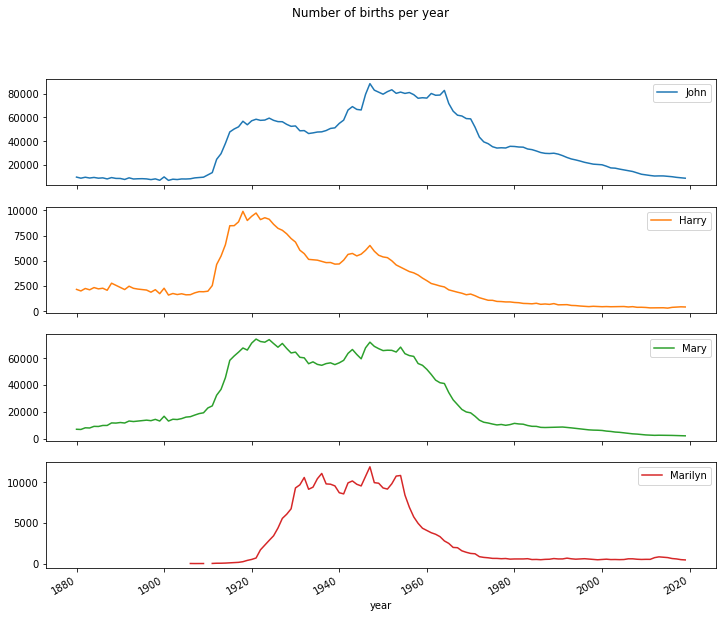

In [146]:
subset.plot(subplots=True, figsize=(12,10), grid=False, title='Number of births per year')

In [147]:
table = top1000_1.pivot_table('prop', index='year', columns='sex', aggfunc=sum)

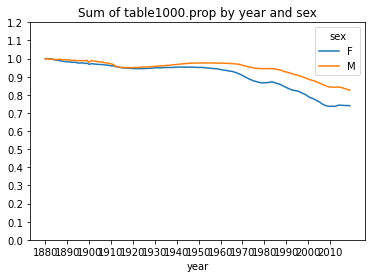

In [148]:
table.plot(title='Sum of table1000.prop by year and sex', yticks=np.linspace(0,1.2,13), xticks=range(1880,2020,10))

In [149]:
# number of distinct names, taken in order of popularity from highest to lowest
# in the top 50% of births
# consider first just boy names from 2010
df = boys[boys.year==2010]
df

,name,sex,births,year,prop
260877,Jacob,M,22136,2010,0.011547
260878,Ethan,M,18004,2010,0.009392
260879,Michael,M,17359,2010,0.009055
260880,Jayden,M,17185,2010,0.008964
260881,William,M,17054,2010,0.008896
...,...,...,...,...,...
261872,Bailey,M,196,2010,0.000102
261873,Destin,M,196,2010,0.000102
261874,Eliezer,M,196,2010,0.000102
261875,Enoch,M,196,2010,0.000102


In [151]:
# how many of the most popoular names it takes to reach 50%
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()

In [152]:
prop_cumsum[:10]

260877    0.011547
260878    0.020939
260879    0.029994
260880    0.038958
260881    0.047854
260882    0.056596
260883    0.065180
260884    0.073447
260885    0.081554
260886    0.089638
Name: prop, dtype: float64

In [153]:
prop_cumsum.searchsorted(0.5)

116

In [154]:
# for boys' names from 1900
df = boys[boys.year==1900]

In [157]:
in1900 = df.sort_values(by='prop', ascending=False).prop.cumsum()
in1900

40877    0.065318
40878    0.122329
40879    0.170476
40880    0.206381
40881    0.233614
           ...   
41848    0.979525
41847    0.979579
41846    0.979632
41845    0.979685
41876    0.979738
Name: prop, Length: 1000, dtype: float64

In [156]:
in1900.searchsorted(0.5) + 1

25

In [159]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().searchsorted(q) + 1

diversity = top1000_1.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')

In [160]:
diversity

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16
...,...,...
2015,244,135
2016,249,139
2017,254,143


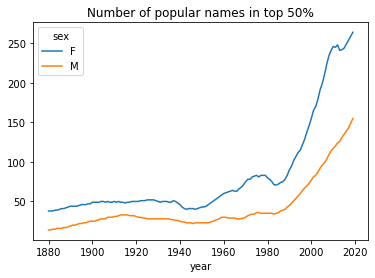

In [161]:
diversity.plot(title='Number of popular names in top 50%')

In [178]:
# extract last letter from name column
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter' # set the name for this Series

table = names.pivot_table('births', index=last_letters, columns=['sex','year'], aggfunc=sum)
table

sex                F                                                        \
year            1880     1881     1882     1883     1884     1885     1886   
last_letter                                                                  
a            31446.0  31581.0  36536.0  38329.0  43680.0  45408.0  49100.0   
b                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d              609.0    607.0    734.0    810.0    916.0    862.0   1007.0   
e            33381.0  34080.0  40399.0  41913.0  48089.0  49616.0  53883.0   
f                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
g                7.0      5.0     12.0      8.0     24.0     11.0     18.0   
h             4863.0   4783.0   5566.0   5701.0   6602.0   6623.0   7146.0   
i               61.0     78.0     81.0     76.0     84.0     92.0     85.0   
j                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
k               13.0     15.0     11.0     17.0     21.0     18.0     27.0   
l             2541.0   2910.0   3527.0   3848.0   4807.0   5144.0   5721.0   
m               58.0     57.0     81.0     86.0     79.0     75.0    103.0   
n             3008.0   2959.0   3575.0   3836.0   4507.0   4735.0   5242.0   
o               30.0     49.0     35.0     47.0     74.0     84.0     93.0   
p                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
q                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
r              481.0    417.0    590.0    640.0    718.0    799.0    917.0   
s             1391.0   1316.0   1637.0   1794.0   2038.0   2127.0   2524.0   
t             2152.0   2165.0   2399.0   2554.0   2824.0   2889.0   3017.0   
u              380.0    427.0    410.0    444.0    490.0    495.0    511.0   
v                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
w                NaN      5.0      NaN      NaN      NaN      NaN      5.0   
x                NaN      NaN      NaN      7.0      NaN      NaN      NaN   
y            10467.0  10404.0  12143.0  12063.0  13918.0  13927.0  14932.0   
z              106.0     95.0    106.0    141.0    148.0    150.0    202.0   

sex                                     ...         M                      \
year            1887     1888     1889  ...      2010      2011      2012   
last_letter                             ...                                 
a            48942.0  59440.0  58631.0  ...   28881.0   27469.0   27220.0   
b                NaN      NaN      NaN  ...   39290.0   36687.0   34736.0   
c                NaN      NaN      NaN  ...   23356.0   23136.0   24287.0   
d             1027.0   1298.0   1374.0  ...   44843.0   43274.0   42501.0   
e            54353.0  66748.0  66662.0  ...  130296.0  128838.0  128552.0   
f                NaN      NaN      NaN  ...    2312.0    2302.0    2481.0   
g               25.0     44.0     28.0  ...    2697.0    2682.0    3805.0   
h             7141.0   8630.0   8825.0  ...   99340.0   98430.0   99095.0   
i              105.0    141.0    134.0  ...   43459.0   44570.0   47140.0   
j                NaN      NaN      NaN  ...    1479.0    1552.0    1499.0   
k               19.0     21.0     22.0  ...   35528.0   34265.0   34131.0   
l             6174.0   7900.0   8395.0  ...  135067.0  131919.0  129040.0   
m               90.0    123.0    137.0  ...   47361.0   50864.0   55095.0   
n             5512.0   6832.0   7103.0  ...  694761.0  690802.0  682522.0   
o               97.0    134.0    142.0  ...   81597.0   79400.0   78244.0   
p                NaN      NaN      NaN  ...    2432.0    2368.0    2526.0   
q                NaN      NaN      NaN  ...     345.0     357.0     337.0   
r              910.0   1207.0   1214.0  ...  167533.0  166239.0  167617.0   
s             2803.0   3581.0   3569.0  ...  124912.0  121487.0  122039.0   
t             3140.0   3816.0   3784.0  ...

In [179]:
# Conform Series/DataFrame to new index with optional filling logic
# Places NA/NaN in locations having no value in the previous index
# Select three representative years spanning the history
subtable = table.reindex(columns=[1910,1960,2010], level='year')

In [182]:
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108399.0  691274.0  677049.0    977.0    5214.0   28881.0
b                 NaN     694.0     455.0    411.0    3912.0   39290.0
c                 5.0      49.0     957.0    482.0   15457.0   23356.0
d              6751.0    3731.0    2644.0  22113.0  262117.0   44843.0
e            133601.0  435027.0  316855.0  28665.0  178764.0  130296.0

In [183]:
# normalize the table
subtable.sum()

sex  year
F    1910     396505.0
     1960    2022015.0
     2010    1775857.0
M    1910     194210.0
     1960    2132133.0
     2010    1917024.0
dtype: float64

In [185]:
letter_prop = subtable/subtable.sum()
letter_prop

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273386  0.341874  0.381252  0.005031  0.002445  0.015066
b                 NaN  0.000343  0.000256  0.002116  0.001835  0.020495
c            0.000013  0.000024  0.000539  0.002482  0.007250  0.012183
d            0.017026  0.001845  0.001489  0.113861  0.122937  0.023392
e            0.336947  0.215145  0.178424  0.147598  0.083843  0.067968
f                 NaN  0.000010  0.000055  0.000783  0.004329  0.001206
g            0.000144  0.000157  0.000377  0.002260  0.009488  0.001407
h            0.051530  0.036221  0.075985  0.045564  0.037913  0.051820
i            0.001526  0.039967  0.031697  0.000844  0.000610  0.022670
j                 NaN       NaN  0.000093       NaN       NaN  0.000772
k            0.000121  0.000155  0.000355  0.036579  0.049376  0.018533
l            0.043187  0.033867  0.026390  0.065022  0.104890  0.070457
m            0.001200  0.008613  0.002599  0.058045  0.033834  0.024705
n            0.079237  0.130672  0.140056  0.143386  0.152525  0.362416
o            0.001672  0.002439  0.001247  0.017064  0.012844  0.042564
p            0.000018  0.000023  0.000020  0.003172  0.005675  0.001269
q                 NaN       NaN  0.000030       NaN       NaN  0.000180
r            0.013395  0.006765  0.018046  0.064471  0.031043  0.087392
s            0.039036  0.012764  0.013337  0.130797  0.102701  0.065159
t            0.027432  0.015198  0.007838  0.072885  0.065645  0.022861
u            0.000683  0.000575  0.000416  0.000124  0.000057  0.001228
v                 NaN  0.000060  0.000117  0.000113  0.000036  0.001449
w            0.000020  0.000031  0.001190  0.006323  0.007708  0.016184
x            0.000015  0.000037  0.000729  0.003965  0.001851  0.008599
y            0.110975  0.152556  0.116762  0.077344  0.160983  0.058196
z            0.002436  0.000658  0.000700  0.000170  0.000184  0.001829

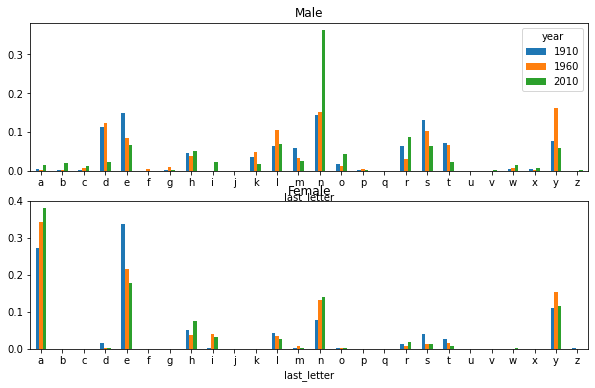

In [187]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2,1,figsize=(10,6))
letter_prop['M'].plot(kind='bar',rot=0,ax=axes[0],title='Male')
letter_prop['F'].plot(kind='bar',rot=0,ax=axes[1],title='Female',legend=False)

In [188]:
letter_prop_full=table/table.sum()

In [189]:
dny_ts=letter_prop_full.loc[['d','n','y'],'M'].T

In [190]:
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083057,0.153217,0.075763
1881,0.083242,0.153212,0.077455
1882,0.085332,0.149561,0.077538
1883,0.084053,0.151656,0.079149
1884,0.086122,0.149927,0.080408


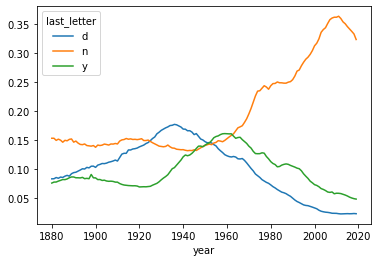

In [191]:
dny_ts.plot()

In [193]:
all_names = top1000_1.name.unique()
all_names

array(['Mary', 'Anna', 'Emma', ..., 'Seven', 'Dhruv', 'Aayan'],
      dtype=object)

In [194]:
mask = np.array(['lesl' in x.lower() for x in all_names])

In [195]:
lesley_like = all_names[mask]
lesley_like

array(['Leslie', 'Lesley', 'Leslee', 'Lesli', 'Lesly'], dtype=object)

In [196]:
# filter down to 'lesl' names
filtered = top1000_1[top1000_1.name.isin(lesley_like)]

In [197]:
filtered.groupby('name').births.sum()

name
Leslee       993
Lesley     35036
Lesli        929
Leslie    378749
Lesly      11433
Name: births, dtype: int64

In [198]:
# aggregate by sex and year; normalize within year
table = filtered.pivot_table('births', index='year', columns='sex', aggfunc='sum')
table = table.div(table.sum(1), axis=0)

In [199]:
table

sex,F,M
year,,
1880,0.091954,0.908046
1881,0.106796,0.893204
1882,0.065693,0.934307
1883,0.053030,0.946970
1884,0.107143,0.892857
...,...,...
2015,1.000000,NaN
2016,1.000000,NaN
2017,1.000000,NaN


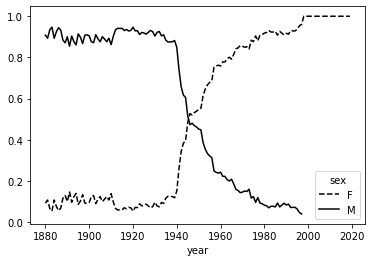

In [200]:
table.plot(style={'M':'k-','F':'k--'})